|                |   |
:----------------|---|
| **Nombres**     | Jocelyn Jiménez, Elisa Aguirre y Valeria Guzman
| **Fecha**      | 23/02/26  |

# **Comparación de modelos de regresión lineal para la predicción del precio de vivienda en Miami.**

# Objetivos

## Objetivo General

Analizar y comparar distintos modelos de regresión para explicar y predecir el precio de las viviendas en Miami a partir de características estructurales y variables del entorno.

## Objetivos Específicos

Explorar y describir el dataset de viviendas en Miami, identificando las variables relevantes para el análisis.

Realizar la limpieza y transformación de datos necesarias para su implementación en modelos de regresión.

Construir tres modelos distintos de regresión: uno lineal base, uno con términos polinomiales y uno con interacciones entre variables.

Implementar versiones con regularización (Ridge, Lasso y ElasticNet) para cada uno de los modelos propuestos.

Comparar el desempeño de los modelos mediante el coeficiente de determinación R² utilizando un esquema de entrenamiento y prueba.

Analizar la significancia estadística de los factores en el modelo sin penalización.

Determinar cuál especificación ofrece la mejor capacidad predictiva.

# Marco teórico

## Regresión lineal

La regresión lineal es un método estadístico utilizado para analizar la relación entre una variable dependiente y una o más variables independientes. Su objetivo es encontrar una relación matemática que permita estimar o predecir el valor de una variable a partir de otras.

El modelo se ajusta comúnmente utilizando el método de mínimos cuadrados ordinarios, el cual busca minimizar la diferencia entre los valores observados y los valores predichos. (James et al., 2023, Sección 3.1.1)

Para evaluar su desempeño se emplea el coeficiente de determinación R², que indica qué tan bien las variables incluidas logran explicar el comportamiento de la variable que se desea predecir. (James et al., 2023, Sección 3.1.3)

## Regresión polinomial

La regresión polinomial es una extensión de la regresión lineal que permite modelar relaciones más complejas entre las variables. Se utiliza cuando la relación entre la variable que se quiere predecir y las variables explicativas no es completamente recta, sino que presenta curvaturas.

Para lograrlo, se agregan términos elevados a potencias, como cuadrados o cúbicos, lo que permite que el modelo capture mejor ciertos patrones en los datos.

Aunque el modelo sigue siendo lineal en su estructura general, esta técnica permite un ajuste más flexible cuando la relación entre variables no es estrictamente lineal.

## Interacción de factores

Una interacción se presenta cuando la influencia de una variable sobre la variable dependiente varía según el valor que tome otra variable. Es decir, el efecto conjunto no se explica únicamente sumando los efectos individuales, ya que una variable puede alterar la manera en que la otra impacta el resultado.

Desde una perspectiva económica, tiene sentido suponer que el valor adicional de los metros cuadrados puede depender de la calidad de la construcción, que el impacto de la edad de la vivienda puede variar según el estado de la estructura, o que el valor del terreno puede depender de su ubicación.

Incluir términos de interacción en el modelo permite analizar estos efectos combinados y obtener una representación más realista del proceso de formación del precio inmobiliario.

## Significancia de factores

La significancia estadística permite evaluar si una variable realmente tiene influencia sobre la variable que se desea predecir dentro del modelo. Para ello se utilizan los valores p, que indican si existe evidencia suficiente para afirmar que el efecto estimado no es producto del azar.

Cuando el p-value es pequeño, se considera que la variable tiene un efecto estadísticamente significativo. En cambio, un p-value elevado sugiere que no hay suficiente evidencia para concluir que dicha variable influye en el modelo. (James et al., 2023, Sección 3.1.2)

Este análisis es fundamental para identificar cuáles factores aportan información relevante en la explicación del precio de la vivienda.

## Regularización (Ridge, Lasso, ElasticNet)

La regularización es una técnica utilizada en modelos de regresión para mejorar su capacidad de generalización. Su objetivo principal es evitar el sobreajuste, es decir, que el modelo aprenda demasiado los datos de entrenamiento y pierda precisión al aplicarse a nuevos datos. Esto puede ocurrir cuando hay muchas variables explicativas o cuando algunas están altamente correlacionadas entre sí.

Estas técnicas aplican una penalización que limita el valor de los coeficientes. Esto ayuda a que el modelo no dependa demasiado de ciertos factores y tenga un comportamiento más equilibrado.

La regresión Ridge penaliza la suma de los coeficientes al cuadrado, lo que reduce su magnitud, pero mantiene todas las variables dentro del modelo.

La regresión Lasso aplica una penalización basada en valores absolutos, lo que puede llevar a que algunos coeficientes se reduzcan completamente a cero. De esta manera, el modelo conserva únicamente las variables más relevantes.

ElasticNet combina ambas formas de penalización, lo que permite mantener estabilidad en los coeficientes y, al mismo tiempo, simplificar el modelo cuando algunas variables aportan poca información.

## Tema elegido para proyecto

Este proyecto analiza el precio de las viviendas en Miami con el objetivo de identificar los factores que influyen en su valor y evaluar la capacidad predictiva de distintos modelos de regresión.

El mercado inmobiliario depende de características como el tamaño, la calidad, la ubicación y otras variables del entorno, por lo que resulta adecuado utilizar modelos estadísticos que permitan estudiar estas relaciones y estimar el precio de una vivienda a partir de sus características.


Importamos librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Importamos el dataset y visualizamos su información*

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


df = pd.read_csv("miami-housing.csv")
df.head()

Saving miami-housing.csv to miami-housing.csv


,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


# Análisis de dataset

El dataset utilizado en este proyecto proviene de la plataforma Kaggle, específicamente del conjunto de datos “Miami Housing Dataset”. Este conjunto recopila información sobre propiedades residenciales en la ciudad de Miami, incluyendo el precio de venta y diversas características relacionadas con el tamaño del terreno, el área construida, la calidad de la estructura, la edad de la vivienda y distancias a distintos puntos de interés como el centro urbano, el océano y vías principales.

Cada observación representa una vivienda vendida en la ciudad, por lo que las muestras permiten analizar cómo distintas características estructurales y de ubicación influyen en el valor de las propiedades y estudiar patrones dentro del mercado inmobiliario.

El objetivo del análisis es evaluar qué variables tienen mayor impacto en la determinación del precio y qué tan bien distintos modelos de regresión logran predecir su valor. Asimismo, se busca comparar diferentes especificaciones del modelo para identificar cuál ofrece un mejor desempeño predictivo.


In [ ]:
df.shape

(13932, 17)

*Se eliminan variables que no aportan información predictiva a nuestor enfoque del modelo.*

In [ ]:
df = df.drop(columns=["PARCELNO", "LATITUDE", "LONGITUDE", "SUBCNTR_DI", "WATER_DIST"])

In [ ]:
df.shape

(13932, 12)

In [ ]:
df.head(2)

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,CNTR_DIST,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,440000.0,9375,1753,0,2815.9,12811.4,42815.3,15954.9,67,0,8,4
1,349000.0,9375,1715,0,4359.1,10648.4,43504.9,18125.0,63,0,9,4


*Verificamos la cantidad de valores nulos*

In [ ]:
df.isnull().sum()

,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
CNTR_DIST,0
HWY_DIST,0
age,0
avno60plus,0


## **Modelo 1. Regresión Lineal Base**
El efecto de cada variable por individual sobre el precio

    1.1 Regresión lineal base sin penalización
    1.2 Regresión lineal base con Ridge, Lasso, ElasticNet
    
# Modelo propuesto

En el primer modelo se estimó una regresión lineal múltiple con el objetivo de explicar el precio de venta de las viviendas (SALE_PRC) a partir de características estructurales y variables del entorno.

Las variables explicativas incluidas fueron el tamaño del terreno (LND_SQFOOT), el área total habitable (TOT_LVG_AREA), el valor de características especiales (SPEC_FEAT_VAL), la edad de la estructura (age), la calidad de la construcción (structure_quality), la distancia a la vía ferroviaria (RAIL_DIST), la distancia al océano (OCEAN_DIST), la distancia al centro de la ciudad (CNTR_DIST), la distancia a autopistas (HWY_DIST), el indicador de ruido aéreo (avno60plus) y el mes de venta (month_sold).

Primero, el modelo se ajustó utilizando el conjunto completo de datos con el fin de obtener una estimación general de los coeficientes y del coeficiente de determinación R². Posteriormente, se realizó una división de los datos en un conjunto de entrenamiento (70%) y uno de prueba (30%) mediante la función train_test_split con random_state = 42, con el propósito de evaluar la capacidad predictiva fuera de muestra.

Finalmente, se estimaron versiones penalizadas del modelo mediante las técnicas Ridge, Lasso y ElasticNet (α = 1.0), lo que permitió comparar el desempeño del modelo lineal base frente a especificaciones con regularización.


**1.1**

In [ ]:
X = df.drop(columns=["SALE_PRC"])

In [ ]:
y = df['SALE_PRC']

In [ ]:
#Importamos
from sklearn.linear_model import LinearRegression

#Regresión lineal
lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

In [ ]:
#intercepto y coeficientes
intercept = lr.intercept_
coef = lr.coef_

print("Intercepto:", intercept)
print("Coeficientes:", coef)

Intercepto: 76780.64584686118
Coeficientes: [ 2.99511532e+00  1.94377146e+02  2.93261784e+00  4.71611981e+00
 -4.52333598e+00 -3.19420181e+00  4.67689616e+00 -1.95519687e+03
 -6.33619979e+04  9.47790232e+01  6.15155016e+04]


**R^2 regresión lineal base**

In [ ]:
#R^2
r2 = lr.score(X, y)
print("R2:", r2)

R2: 0.68589146604794


*Train-test split*

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

In [ ]:
lr_train = LinearRegression()
lr_train.fit(X_train, y_train)

LinearRegression()

**R^2 train-test split**

In [ ]:
r2_train = lr_train.score(X_train, y_train)
r2_test = lr_train.score(X_test, y_test)

print("R2 Train:", r2_train)
print("R2 Test:", r2_test)

R2 Train: 0.6884122066945604
R2 Test: 0.6796792808635818


El modelo de regresión lineal base explicó aproximadamente el 68% de la variabilidad en el precio de venta de las viviendas.
La pequeña diferencia entre el R² train de 0.688 y el R² test de 0.679 nos dice que el modelo presenta un buen desempeño y no hay un sobreajuste, por lo tanto, esta generalizando muy bien.

**1.2**

*Escalamos variables*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Penalización Ridge*

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

r2_train_ridge = ridge.score(X_train_scaled, y_train)
r2_test_ridge = ridge.score(X_test_scaled, y_test)

print("Ridge R2 Train:", r2_train_ridge)
print("Ridge R2 Test:", r2_test_ridge)

Ridge R2 Train: 0.6884122002346986
Ridge R2 Test: 0.6796802379752731


In [ ]:
ridge.coef_

array([ 1.79080250e+04,  1.60372012e+05,  4.14862343e+04,  3.01500745e+04,
       -7.89164220e+04, -1.01973340e+05,  2.65834671e+04, -4.05211415e+04,
       -6.88662332e+03,  2.22822788e+01,  6.70364504e+04])

La aplicación de regularización Ridge no produjo mejoras significativas en el R² respecto al modelo base, lo que sugiere que no existe un problema de multicolinealidad ni sobreajuste.

*Penalización Lasso*

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

r2_train_lasso = lasso.score(X_train_scaled, y_train)
r2_test_lasso = lasso.score(X_test_scaled, y_test)

print("Lasso R2 Train:", r2_train_lasso)
print("Lasso R2 Test:", r2_test_lasso)

Lasso R2 Train: 0.6884122065650993
Lasso R2 Test: 0.6796791520856647


In [ ]:
print(lasso.coef_)

[ 1.79015208e+04  1.60393808e+05  4.14796658e+04  3.01581412e+04
 -7.89220546e+04 -1.01991309e+05  2.65844730e+04 -4.05257246e+04
 -6.88575376e+03  2.13734817e+01  6.70354920e+04]


Se utilizó un valor de α = 1.0 como parámetro de penalización inicial, dado que corresponde al valor estándar implementado en la biblioteca. Este valor permite observar el efecto de la regularización sin imponer una penalización excesiva que distorsione el modelo base.

Aunque el R² no presentó alguna variación al aplicar regularización Lasso, se observó una reducción en la magnitud de los coeficientes, lo que indica una estabilización del modelo sin pérdida relevante en capacidad predictiva.

No se observaron mejoras significativas, por lo tanto el modelo base ya es estable.

*ElasticNet*

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)

r2_train_elastic = elastic.score(X_train_scaled, y_train)
r2_test_elastic = elastic.score(X_test_scaled, y_test)

print("ElasticNet R2 Train:", r2_train_elastic)
print("ElasticNet R2 Test:", r2_test_elastic)

ElasticNet R2 Train: 0.6364317451059325
ElasticNet R2 Test: 0.6301992188688923


In [ ]:
elastic.coef_

array([ 2.78677010e+04,  1.04825572e+05,  4.87254043e+04,  7.63686323e+03,
       -5.34744316e+04, -5.59179588e+04,  2.16244011e+04, -2.43008642e+04,
       -5.59763773e+03, -6.43121277e+01,  5.58625314e+04])

A diferencia de Ridge y Lasso, ElasticNet mostró una disminución en el coeficiente de determinación, lo que sugiere que la penalización combinada resultó excesiva para la estructura del modelo base. Con alpha=1 y l1_ratio=0.5 se aplica una penalización más fuerte combinada, el modelo base ya era estable y no necesitaba tanta regularización.

No hay evidencia de sobreajuste en el modelo lineal base, dado que el desempeño en entrenamiento y prueba es consistente.

# **MODELO 2. POLINOMIAL**
Para este modelo elegimos variables donde consideremos que la relación económica no sea lineal.

    2.1 Regresión lineal base + polinimial sin penalización
    2.2 Regresión lineal base + polinimial con Ridge, Lasso, ElasticNet

En el Modelo 2 se incorporaron términos cuadráticos para variables seleccionadas con el objetivo de capturar posibles relaciones no lineales entre ciertas características de la vivienda y su precio de venta. A diferencia del modelo lineal base, que asume efectos constantes, la inclusión de términos polinomiales permite modelar situaciones donde el impacto de una variable cambia según su nivel.

No se elevaron todas las variables explicativas al cuadrado, ya que esto podría generar complejidad innecesaria, incrementar el número de parámetros y provocar problemas de multicolinealidad que afecten la estabilidad del modelo. En su lugar, se seleccionaron únicamente aquellas variables para las cuales existe una justificación económica de comportamiento no lineal.

Las variables elegidas fueron:

TOT_LVG_AREA (área total construida): El tamaño de la vivienda es uno de los principales determinantes del precio. Sin embargo, su efecto no necesariamente es lineal, ya que el valor adicional por metro cuadrado puede disminuir a medida que aumenta el tamaño de la propiedad.

CNTR_DIST (distancia al centro de la ciudad): La ubicación es un factor clave en el valor inmobiliario. No obstante, el impacto de la distancia al centro no suele ser proporcional, ya que pequeñas variaciones en zonas cercanas pueden tener efectos distintos a las mismas variaciones en zonas más alejadas.

Al igual que en el Modelo 1, se realizó una división de los datos en entrenamiento (70%) y prueba (30%) mediante train_test_split con random_state = 42. Posteriormente, se estimaron versiones sin penalización, así como versiones con Ridge, Lasso y ElasticNet (α = 1.0), con el fin de comparar su desempeño predictivo.

**2.1**

*Creamos nuevas variables cuadráticas*

In [ ]:
df["TOT_LVG_AREA_sq"] = df["TOT_LVG_AREA"]**2
df["CNTR_DIST_sq"] = df["CNTR_DIST"]**2

df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,CNTR_DIST,HWY_DIST,age,avno60plus,month_sold,structure_quality,TOT_LVG_AREA_sq,CNTR_DIST_sq
0,440000.0,9375,1753,0,2815.9,12811.4,42815.3,15954.9,67,0,8,4,3073009,1.833150e+09
1,349000.0,9375,1715,0,4359.1,10648.4,43504.9,18125.0,63,0,9,4,2941225,1.892676e+09
2,800000.0,9375,2276,49206,4412.9,10574.1,43530.4,18200.5,61,0,2,4,5180176,1.894896e+09
3,988000.0,12450,2058,10033,4585.0,10156.5,43797.5,18514.4,63,0,9,4,4235364,1.918221e+09
4,755000.0,12800,1684,16681,4063.4,10836.8,43599.7,17903.4,42,0,7,4,2835856,1.900934e+09


*Definimos "X" y "y"*

In [ ]:
#Definimos "X" y "y"

y = df["SALE_PRC"]
X_poly = df.drop(columns=["SALE_PRC"])

In [ ]:
#regresión lineal base
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

coef_m2 = lr_poly.coef_
r2_poly = lr_poly.score(X_poly, y)

print("Modelo 2 -> Coeficietes:", coef_m2)
print("Modelo 2 -> R2 completo:", r2_poly)

Modelo 2 -> Coeficietes: [ 2.58248444e+00  5.95473217e+01  3.11489497e+00  4.98936784e+00
 -4.04675691e+00 -7.82170114e+00  5.29354090e+00 -2.01470516e+03
 -9.32130429e+04  2.74676658e+02  7.24063118e+04  2.59197368e-02
  3.19857379e-05]
Modelo 2 -> R2 completo: 0.7070847299158438


*Train-test split*

In [ ]:
# Train Test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y,
    test_size=0.3,
    random_state=42
)

In [ ]:
#Regresion lineal train-test split
lr_poly_train = LinearRegression()
lr_poly_train.fit(X_train_p, y_train_p)

r2_train_poly = lr_poly_train.score(X_train_p, y_train_p)
r2_test_poly = lr_poly_train.score(X_test_p, y_test_p)

print("Modelo 2 -> R2 Train:", r2_train_poly)
print("Modelo 2 -> R2 Test:", r2_test_poly)

Modelo 2 -> R2 Train: 0.7099341601733895
Modelo 2 -> R2 Test: 0.7000388310469525


La similitud entre el R² train de 0.7099 y el R² test de 0.7000, sugiere que el modelo sigue manteniendo una buena capacidad de generalización. La creación de términos cuadráticos permitió capturar patrones adicionales en los datos sin comprometer la estabilidad del modelo.

**2.2**

In [ ]:
#Escalamos x
scaler_p = StandardScaler()

X_train_p_scaled = scaler_p.fit_transform(X_train_p)
X_test_p_scaled = scaler_p.transform(X_test_p)

*Penalización Ridge*

In [ ]:
ridge_poly = Ridge(alpha=1.0)
ridge_poly.fit(X_train_p_scaled, y_train_p)

print("Ridge Modelo 2 -> R2 Test:", ridge_poly.score(X_test_p_scaled, y_test_p))

Ridge Modelo 2 -> R2 Test: 0.7000301781225284


*Penalización Lasso*

In [ ]:
lasso_poly = Lasso(alpha=1.0)
lasso_poly.fit(X_train_p_scaled, y_train_p)

print("Lasso Modelo 2 -> R2 Test:", lasso_poly.score(X_test_p_scaled, y_test_p))

Lasso Modelo 2 -> R2 Test: 0.7000381270385675


*ElasticNet*

In [ ]:
elastic_poly = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_poly.fit(X_train_p_scaled, y_train_p)

print("ElasticNet Modelo 2 -> R2 Test:", elastic_poly.score(X_test_p_scaled, y_test_p))

ElasticNet Modelo 2 -> R2 Test: 0.6504149710277426


En cuanto a la regularización, tanto Ridge como Lasso mantuvieron el mismo desempeño predictivo que el modelo OLS y refuerza la idea de que no existe un problema de sobreajuste. Sin embargo, ElasticNet mostró una reducción en el R² a 0.650414, por lo tanto, la penalización combinada resulta excesiva para la estructura del modelo polinomial.

La incorporación de términos cuadráticos para el área construida y la distancia al centro, incrementó el R² de prueba: modelo 1 = 0.68 a modelo 2 = 0.70. Esto nos dice que la relación entre estas dos varoables y el precio no son estrictamente lineales. De igual forma, se puede observar que el modelo mantiene estabilidad en R^2 train/test, hay una buena generalización.


# **MODELO 3.REGRESIÓN CON INTERACCIONES**
Para este modelo se usara el modelo 2 y le agregaremos algunas interacciones económicas que consideramos importantes.

    3.1 Regresión lineal sin penalización
    3.2 Regresión lineal con Ridge, Lasso, ElasticNet

El Modelo 3 amplía la especificación del Modelo 2 mediante la incorporación de términos de interacción entre variables seleccionadas. Mientras que el Modelo 1 asumía efectos independientes y el Modelo 2 permitió capturar no linealidades individuales, este modelo introduce la posibilidad de que el efecto de una variable dependa del nivel de otra.

Dado que el Modelo 2 mostró mejoras al incorporar términos cuadráticos, el Modelo 3 conserva dichas no linealidades e incorpora adicionalmente interacciones con justificación económica. Esto permite evaluar efectos conjuntos sin perder las mejoras previamente identificadas en el ajuste del modelo.

Las interacciones incluidas fueron las siguientes:

TOT_LVG_AREA × structure_quality: permite analizar si el impacto del tamaño de la vivienda sobre el precio varía según la calidad de la construcción.

age × structure_quality: evalúa si el efecto de la antigüedad de la vivienda depende del estado o calidad de la estructura.

LND_SQFOOT × CNTR_DIST: analiza si el valor del tamaño del terreno está condicionado por la ubicación relativa al centro urbano.

En particular, el valor del terreno no suele ser uniforme en toda la ciudad. Un terreno amplio en una zona central puede ser considerablemente más valioso que uno de igual tamaño en áreas periféricas, lo que justifica la inclusión de esta interacción dentro del modelo.

Al igual que en los modelos anteriores, se realizó una división de los datos en entrenamiento (70%) y prueba (30%) mediante train_test_split con random_state = 42. Posteriormente, se estimaron versiones sin penalización, así como versiones con Ridge, Lasso y ElasticNet (α = 1.0), con el fin de comparar su desempeño predictivo.

*Creamos las 3 interacciones*

In [ ]:
df["area_quality"] = df["TOT_LVG_AREA"] * df["structure_quality"]

df["age_quality"] = df["age"] * df["structure_quality"]

df["land_center"] = df["LND_SQFOOT"] * df["CNTR_DIST"]

df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,CNTR_DIST,HWY_DIST,age,avno60plus,month_sold,structure_quality,TOT_LVG_AREA_sq,CNTR_DIST_sq,area_quality,age_quality,land_center
0,440000.0,9375,1753,0,2815.9,12811.4,42815.3,15954.9,67,0,8,4,3073009,1.833150e+09,7012,268,401393437.5
1,349000.0,9375,1715,0,4359.1,10648.4,43504.9,18125.0,63,0,9,4,2941225,1.892676e+09,6860,252,407858437.5
2,800000.0,9375,2276,49206,4412.9,10574.1,43530.4,18200.5,61,0,2,4,5180176,1.894896e+09,9104,244,408097500.0
3,988000.0,12450,2058,10033,4585.0,10156.5,43797.5,18514.4,63,0,9,4,4235364,1.918221e+09,8232,252,545278875.0
4,755000.0,12800,1684,16681,4063.4,10836.8,43599.7,17903.4,42,0,7,4,2835856,1.900934e+09,6736,168,558076160.0


**3.1**

In [ ]:
#Definimos "X" y "y"
y = df["SALE_PRC"]
X_m3 = df.drop(columns=["SALE_PRC"])

In [ ]:
#Regresion lineal

lr_m3 = LinearRegression()
lr_m3.fit(X_m3, y)

coef_m3 = lr_m3.coef_
r2_m3 = lr_m3.score(X_m3, y)

print("Modelo 3 -> Coeficientes:", coef_m3)
print("Modelo 3 -> R2 completo:", r2_m3)

Modelo 3 -> Coeficientes: [ 1.91455866e+01 -7.96599486e+01  2.56168599e+00  5.29315556e+00
 -3.42437254e+00 -6.72107639e+00  6.66768029e+00 -3.02422112e+03
 -7.70582338e+04  3.62967989e+02 -5.40350631e+04  7.34875858e-03
  3.48491003e-05  5.90188999e+01  2.64882794e+02 -1.85373478e-04]
Modelo 3 -> R2 completo: 0.7448175229143956


Como se puede observar, los resultados muestran un incremento notorio en el coeficiente de determinación, alcanzando un R² de prueba de 0.744. Esto representa una mejora respecto a los modelos anteriores. Por lo cual, las interacciones entre características como tamaño, calidad, antigüedad y ubicación son determinantes relevantes en la formación del precio del inmobiliario.

*Train-test split*

In [ ]:
X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(
    X_m3, y,
    test_size=0.3,
    random_state=42
)

In [ ]:
lr_m3_train = LinearRegression()
lr_m3_train.fit(X_train_m3, y_train_m3)

r2_train_m3 = lr_m3_train.score(X_train_m3, y_train_m3)
r2_test_m3 = lr_m3_train.score(X_test_m3, y_test_m3)

print("Modelo 3 -> R2 Train:", r2_train_m3)
print("Modelo 3 -> R2 Test:", r2_test_m3)

Modelo 3 -> R2 Train: 0.745100957782499
Modelo 3 -> R2 Test: 0.7436424799048988


La similitud entre el R² de entrenamiento y prueba confirma que la complejidad adicional no genera sobreajuste, sino que captura patrones.

**3.2**

*Escalamos X*

In [ ]:
scaler_m3 = StandardScaler()

X_train_m3_scaled = scaler_m3.fit_transform(X_train_m3)
X_test_m3_scaled = scaler_m3.transform(X_test_m3)

*Penalización Ridge*

In [ ]:
ridge_m3 = Ridge(alpha=1.0)
ridge_m3.fit(X_train_m3_scaled, y_train_m3)

print("Ridge Modelo 3 -> R2 Test:", ridge_m3.score(X_test_m3_scaled, y_test_m3))

Ridge Modelo 3 -> R2 Test: 0.7436197191387104


*Penalización Lasso*

In [ ]:
lasso_m3 = Lasso(alpha=1.0)
lasso_m3.fit(X_train_m3_scaled, y_train_m3)

print("Lasso Modelo 3 -> R2 Test:", lasso_m3.score(X_test_m3_scaled, y_test_m3))

Lasso Modelo 3 -> R2 Test: 0.743641310019082


*ElasticNet*

In [ ]:
elastic_m3 = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_m3.fit(X_train_m3_scaled, y_train_m3)

print("ElasticNet Modelo 3 -> R2 Test:", elastic_m3.score(X_test_m3_scaled, y_test_m3))

ElasticNet Modelo 3 -> R2 Test: 0.6771808983980956


la estabilidad del desempeño bajo Ridge y Lasso indica que el modelo no presenta problemas de sobreajuste.

# Pipeline

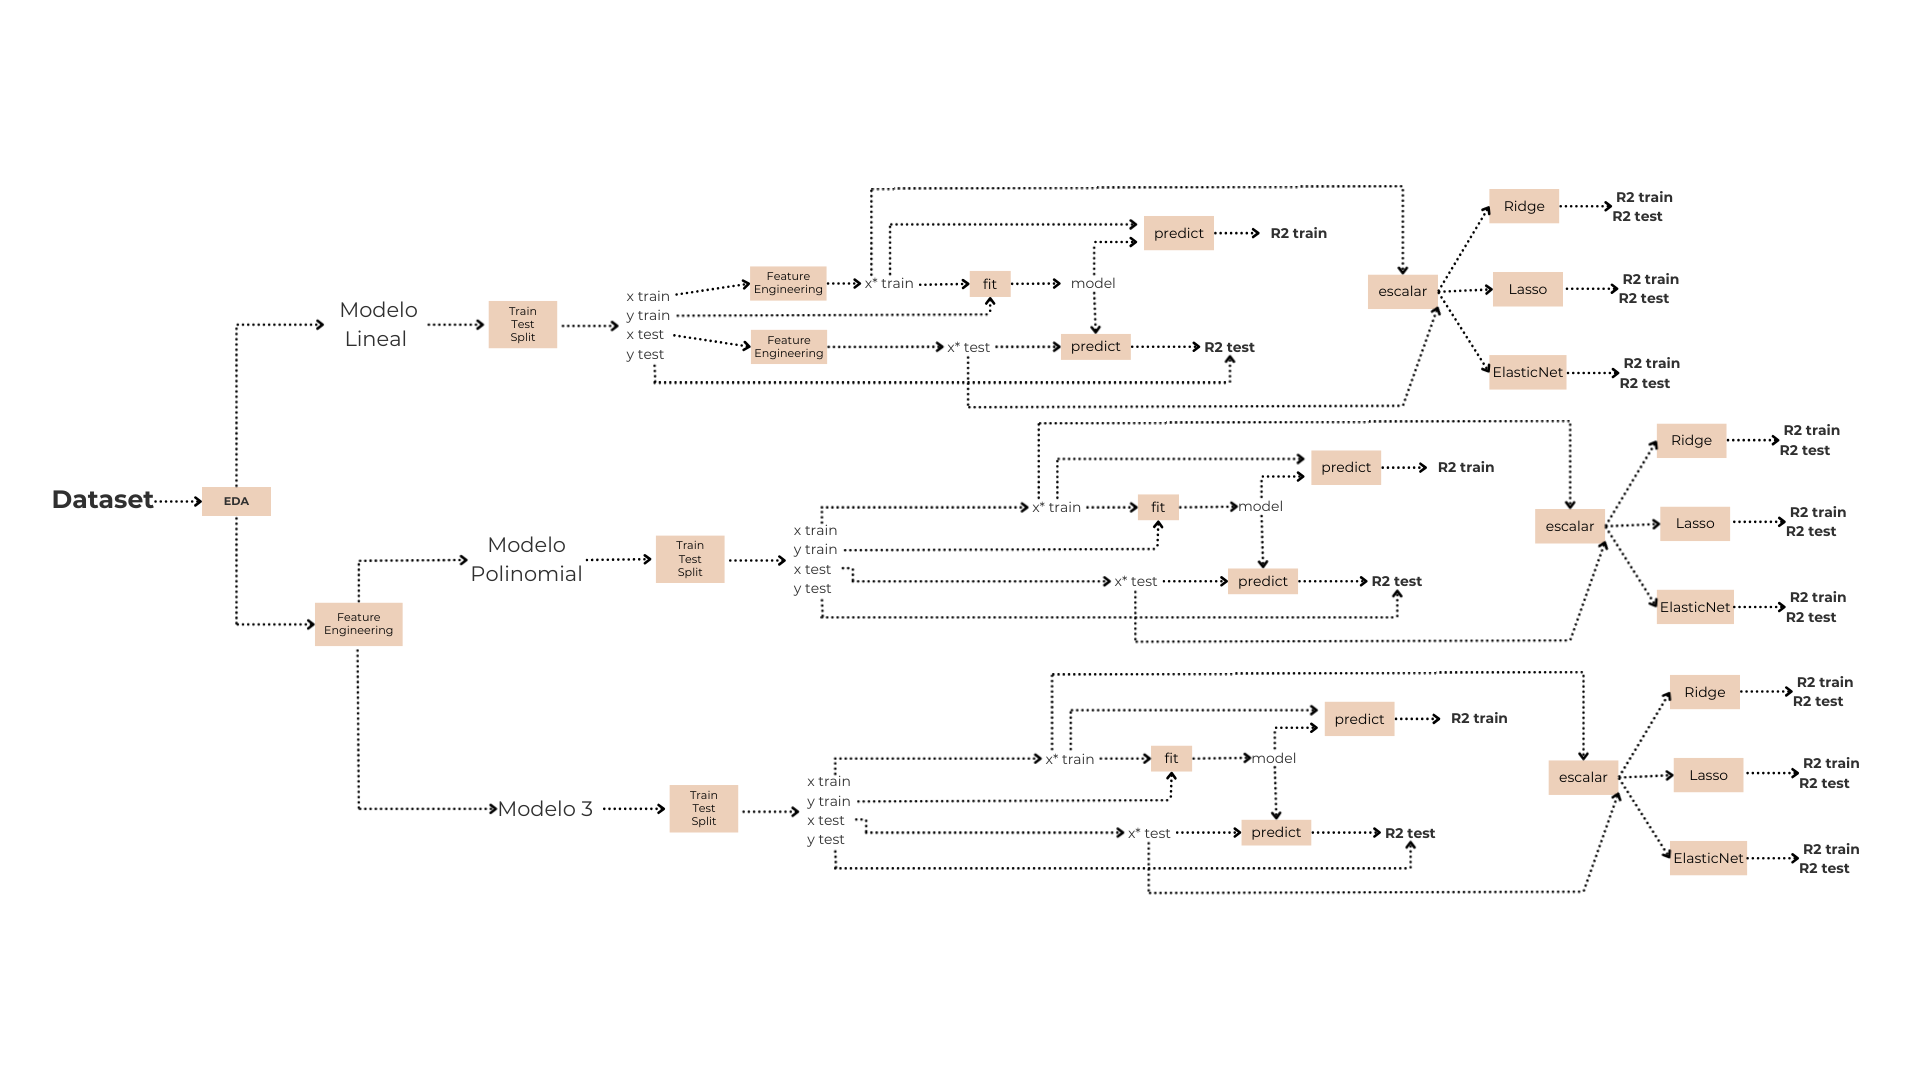

# **Comparación** **de** **R²**



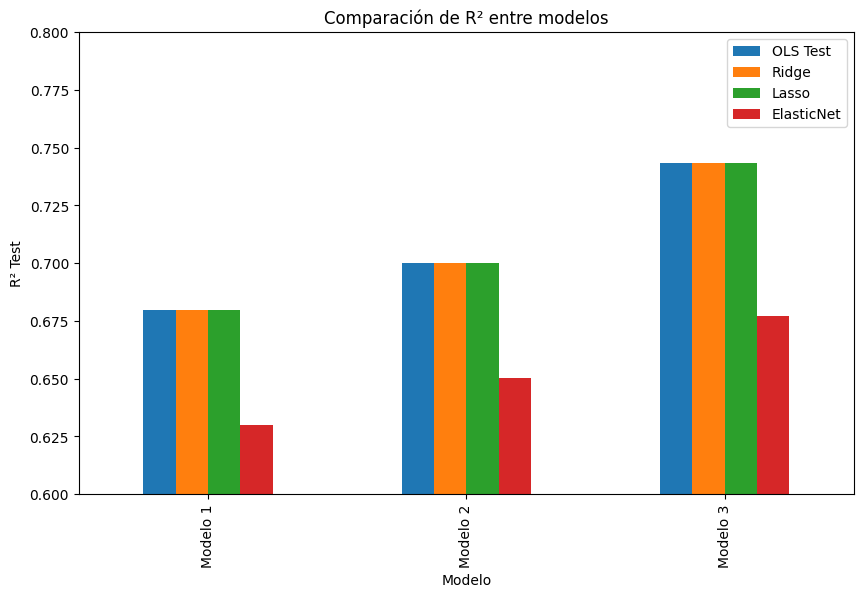

In [ ]:
resultados = pd.DataFrame({
    "Modelo": ["Modelo 1", "Modelo 2", "Modelo 3"],
    "OLS Test": [0.6796, 0.7000, 0.7436],
    "Ridge": [0.6796, 0.7000, 0.7436],
    "Lasso": [0.6796, 0.7000, 0.7436],
    "ElasticNet": [0.6301, 0.6504, 0.677]
})

resultados.set_index("Modelo").plot(kind="bar", figsize=(10,6))
plt.ylabel("R² Test")
plt.title("Comparación de R² entre modelos")
plt.ylim(0.6, 0.8)
plt.show()

*Análisis de significancia de factores para modelo 3 sin penalización*

In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train_m3)
model_sm = sm.OLS(y_train_m3, X_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               SALE_PRC   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1779.
Date:                Mon, 23 Feb 2026   Prob (F-statistic):               0.00
Time:                        01:08:47   Log-Likelihood:            -1.3069e+05
No. Observations:                9752   AIC:                         2.614e+05
Df Residuals:                    9735   BIC:                         2.615e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.248e+05   2.36e+0

Dado que el Modelo 3 presentó el mayor coeficiente de determinación y la mejor capacidad predictiva entre las especificaciones evaluadas, fue seleccionado como modelo final para analizar la significancia individual de los factores. El análisis se realizó sobre el conjunto de entrenamiento, ya que los coeficientes fueron estimados exclusivamente con estos datos.  

El modelo obtuvo un R² = 0.745 y un R² ajustado = 0.745. La similitud entre ambas métricas indica que la inclusión de términos cuadráticos e interacciones aporta valor explicativo real y no genera un sobreajuste innecesario.

En general, casi todas las variables presentan valores p inferiores a 0.05, lo que indica significancia estadística al nivel del 5%. La única variable no significativa fue month_sold, lo que sugiere que el mes de venta no tiene un efecto sistemático sobre el precio dentro de esta especificación.

Las interacciones incorporadas area_quality, age_quality y land_center resultaron estadísticamente significativas, confirmando que el efecto de ciertas variables no es puramente lineal ni independiente. Esto respalda la inclusión de términos que capturen efectos conjuntos entre características estructurales y de ubicación.

Es importante destacar que algunos coeficientes lineales, como los correspondientes al área construida TOT_LVG_AREA y a la calidad estructural structure_quality, presentan signos negativos cuando se observan de manera aislada. Sin embargo, estos efectos deben interpretarse en conjunto con sus términos cuadráticos e interacciones. Por ejemplo, aunque el coeficiente lineal del área es negativo, el término cuadrático TOT_LVG_AREA_sq y la interacción con la calidad estructural area_quality son positivos y significativos. Esto indica que el impacto del área sobre el precio depende del nivel de calidad del inmueble y que la relación no es estrictamente lineal.

De igual forma, la distancia al centro CNTR_DIST muestra un coeficiente negativo, mientras que su término cuadrático es positivo, lo que evidencia una relación no lineal entre ubicación y precio. En consecuencia, el efecto marginal de la localización varía según el nivel de distancia considerado.

# Conclusión

El objetivo de este proyecto fue analizar y comparar distintos modelos de regresión para explicar y predecir el precio de las viviendas en Miami a partir de sus características estructurales y variables del entorno. Con base en los resultados obtenidos, se puede concluir que la especificación del modelo tiene un impacto directo en su capacidad explicativa y predictiva.

El modelo lineal base logró explicar alrededor del 68% del precio de las viviendas. Al agregar términos cuadráticos en el Modelo 2 se observó una mejora en los resultados, lo que indica que algunas variables no se relacionan con el precio de manera completamente lineal. Finalmente, el Modelo 3 fue el que presentó el mayor nivel de explicación, alcanzando un R² de 0.745 sin mostrar señales de sobreajuste, lo que demuestra que esta especificación describe mejor el comportamiento del mercado.

El análisis de significancia permitió identificar con mayor claridad cuáles variables tienen una relación más fuerte con el precio de la vivienda. En particular, el área total construida, la calidad estructural, la distancia al centro de la ciudad y el valor de características especiales mostraron un impacto estadísticamente significativo. Asimismo, los términos cuadráticos y las interacciones resultaron relevantes, confirmando que el efecto de estas variables no es independiente ni puramente lineal. Por ejemplo, la interacción entre el tamaño y la calidad mostró que el efecto del área sobre el precio cambia según la calidad del inmueble.

Por otro lado, la variable month_sold no resultó significativa, lo que sugiere que el mes de venta no tiene un efecto sistemático sobre el precio dentro de esta especificación. Además, las técnicas de regularización no generaron mejoras sustanciales en el desempeño predictivo, lo que indica que el modelo final es estable y no presenta problemas graves de multicolinealidad.

En general, este proyecto permitió entender que el precio de una vivienda no se explica solo por factores individuales como el tamaño o la ubicación, sino por la combinación entre calidad, antigüedad y localización. El Modelo 3 es el que mejor logra reflejar esta relación y, por lo tanto, cumple con el objetivo planteado al inicio del estudio.

# Referencias

Miami Housing Dataset. (2022). Kaggle. https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2023). An introduction to statistical learning with applications in Python. Springer.